# EMOTION DETECTION

# Importing libraries


In [3]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("tensorflow version:", tf.__version__)

tensorflow version: 2.16.1


 **exploring dataset**

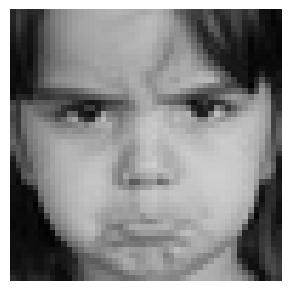

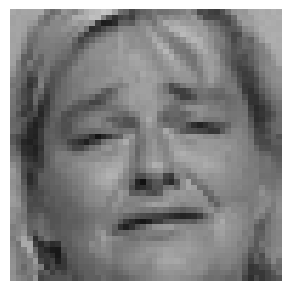

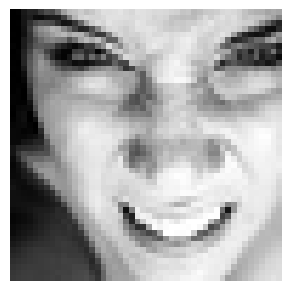

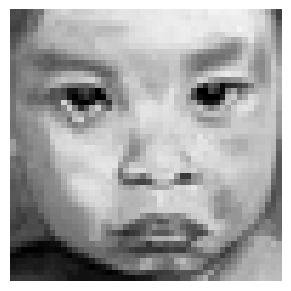

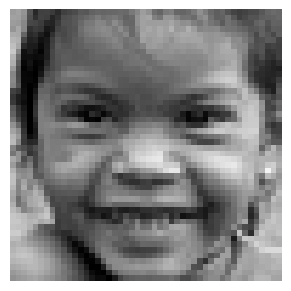

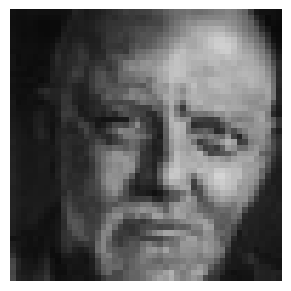

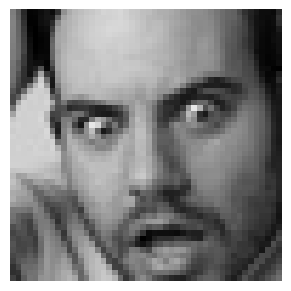

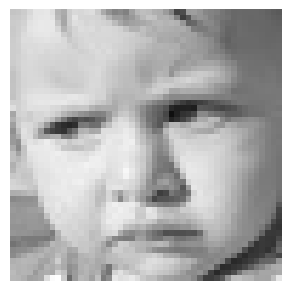

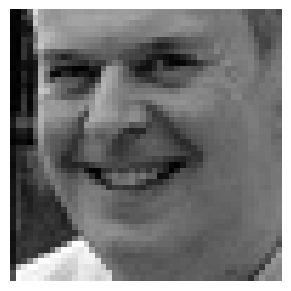

In [4]:
images= glob("train/**/**")
for i in range(9):
    image= random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

**Preparing data for training**

In [36]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size=(img_size,img_size),
                                                   color_mode="grayscale",
                                                   batch_size=batch_size,
                                                   class_mode= "categorical",
                                                   shuffle= True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                   target_size=(img_size,img_size),
                                                   color_mode="grayscale",
                                                   batch_size=batch_size,
                                                   class_mode= "categorical",
                                                   shuffle= True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**defining our model**

In [37]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding= "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [38]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [39]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(inputs,64,(5,5))
    conv_3 = Convolution(inputs,128,(3,3))
    
    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten,256)
    output = Dense(7, activation = "softmax")(dense_1)
    model= Model(inputs = [inputs], outputs = [output])
    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])
    return model

In [40]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 48, 48, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 48, 48, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,879,239 (72.02 MB)

 Trainable params: 18,878,471 (72.02 MB)

 Non-trainable params: 768 (3.00 KB)

**initializing the model**


In [61]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator. batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.keras", monitor = 'val_accuracy' ,mode = 'max' ,verbose = 1)
callbacks = [checkpoint]

# Training the model
**the next cell takes time to complete**

In [63]:
history = model.fit(
    x = train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks)

Epoch 1/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.8364 - loss: 0.4845
Epoch 1: saving model to model_weights.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 290s 646ms/step - accuracy: 0.8364 - loss: 0.4846 - val_accuracy: 0.4608 - val_loss: 1.7902
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:18 444ms/step - accuracy: 0.7812 - loss: 0.6553
Epoch 2: saving model to model_weights.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7812 - loss: 0.6553 - val_accuracy: 0.4000 - val_loss: 2.3598
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.8587 - loss: 0.4161
Epoch 3: saving model to model_weights.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 234s 522ms/step - accuracy: 0.8587 - loss: 0.4162 - val_accuracy: 0.5022 - val_loss: 1.6244
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:13 432ms/step - accuracy: 0.8281 - loss: 0.4148
Epoch 4: saving model to model_weights.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8281 - loss: 0.4148 - val_accuracy: 0.1000 - val_

# Evaluating the model

In [64]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.4887 - loss: 2.0156


[1.9977327585220337, 0.49108386039733887]

**plotting loss**

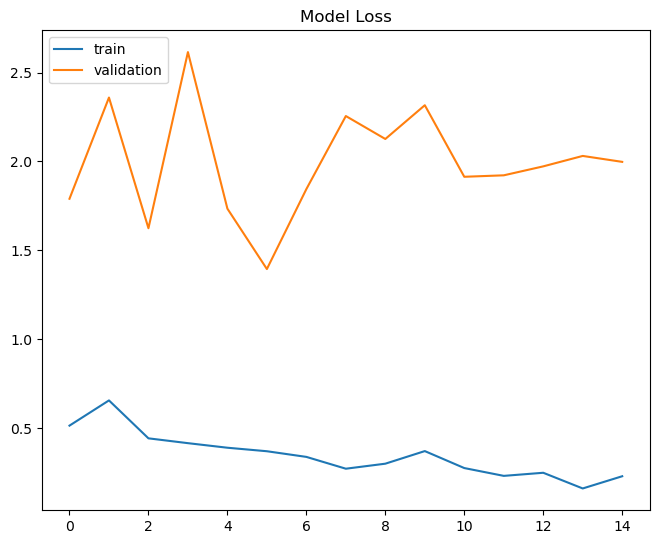

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['train','validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0, bottom=0.0,right=0.95, left=0.0, hspace=0.25, wspace=0.35)

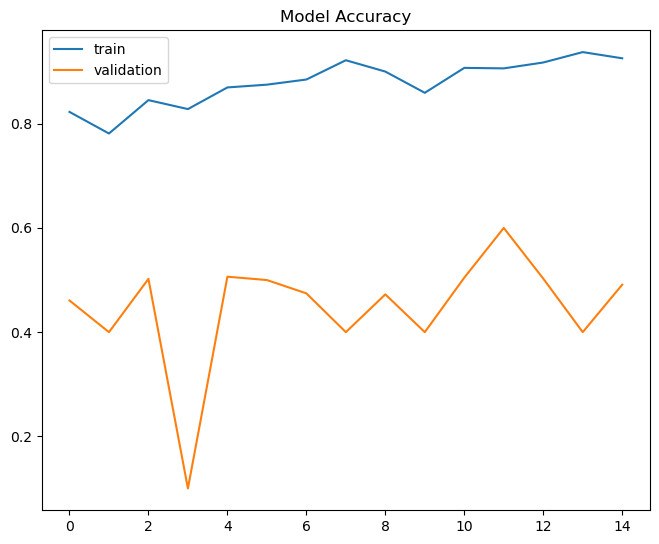

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['train','validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0, bottom=0.0,right=0.95, left=0.0, hspace=0.25, wspace=0.35)

**Saving Model**

In [69]:
model_json = model.to_json()
with open("model_a.json","w")as json_file:
    json_file.write(model_json)